# Question 01

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [190]:
# Load the reuired data
mat_data = scipy.io.loadmat('signals/signal686.mat')

# Access the variable from the loaded data
data = mat_data['xn_test']
data = np.squeeze(data) 


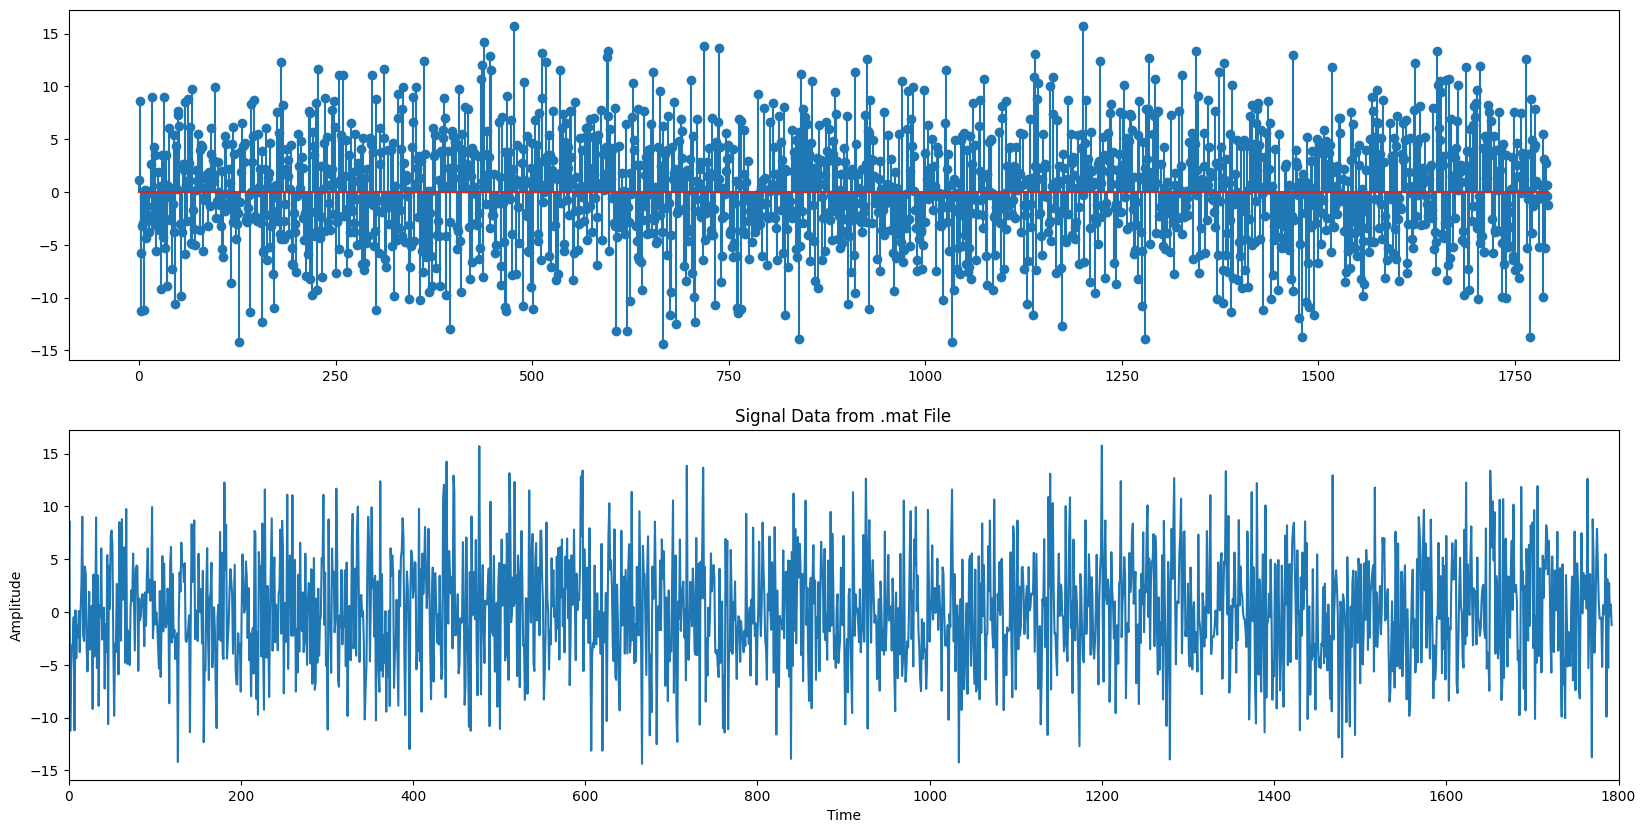

In [191]:
# Visualize the data as a plot
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].stem(data)
ax[1].plot(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,1800)
plt.title('Signal Data from .mat File')
plt.show()

In [192]:
# initialize constants
sample_frequency = 128
period = 14

In [193]:
# Constructing several subsets of the data

s_1 = data[0:129]
s_2 = data[0:257]
s_3 = data[0:513]
s_4 = data[0:1025]
s_5 = data[0:1793]


In [194]:
# Finding DFT
dft_result1 = np.fft.fft(s_1)
dft_result2 = np.fft.fft(s_2)
dft_result3 = np.fft.fft(s_3)
dft_result4 = np.fft.fft(s_4)
dft_result5 = np.fft.fft(s_5)


# Initialize Frequency Array
frequency_bins = [
    np.arange((-sample_frequency/2), (sample_frequency/2), sample_frequency/len(dft_result))
    for dft_result in [dft_result1, dft_result2, dft_result3, dft_result4, dft_result5]
]


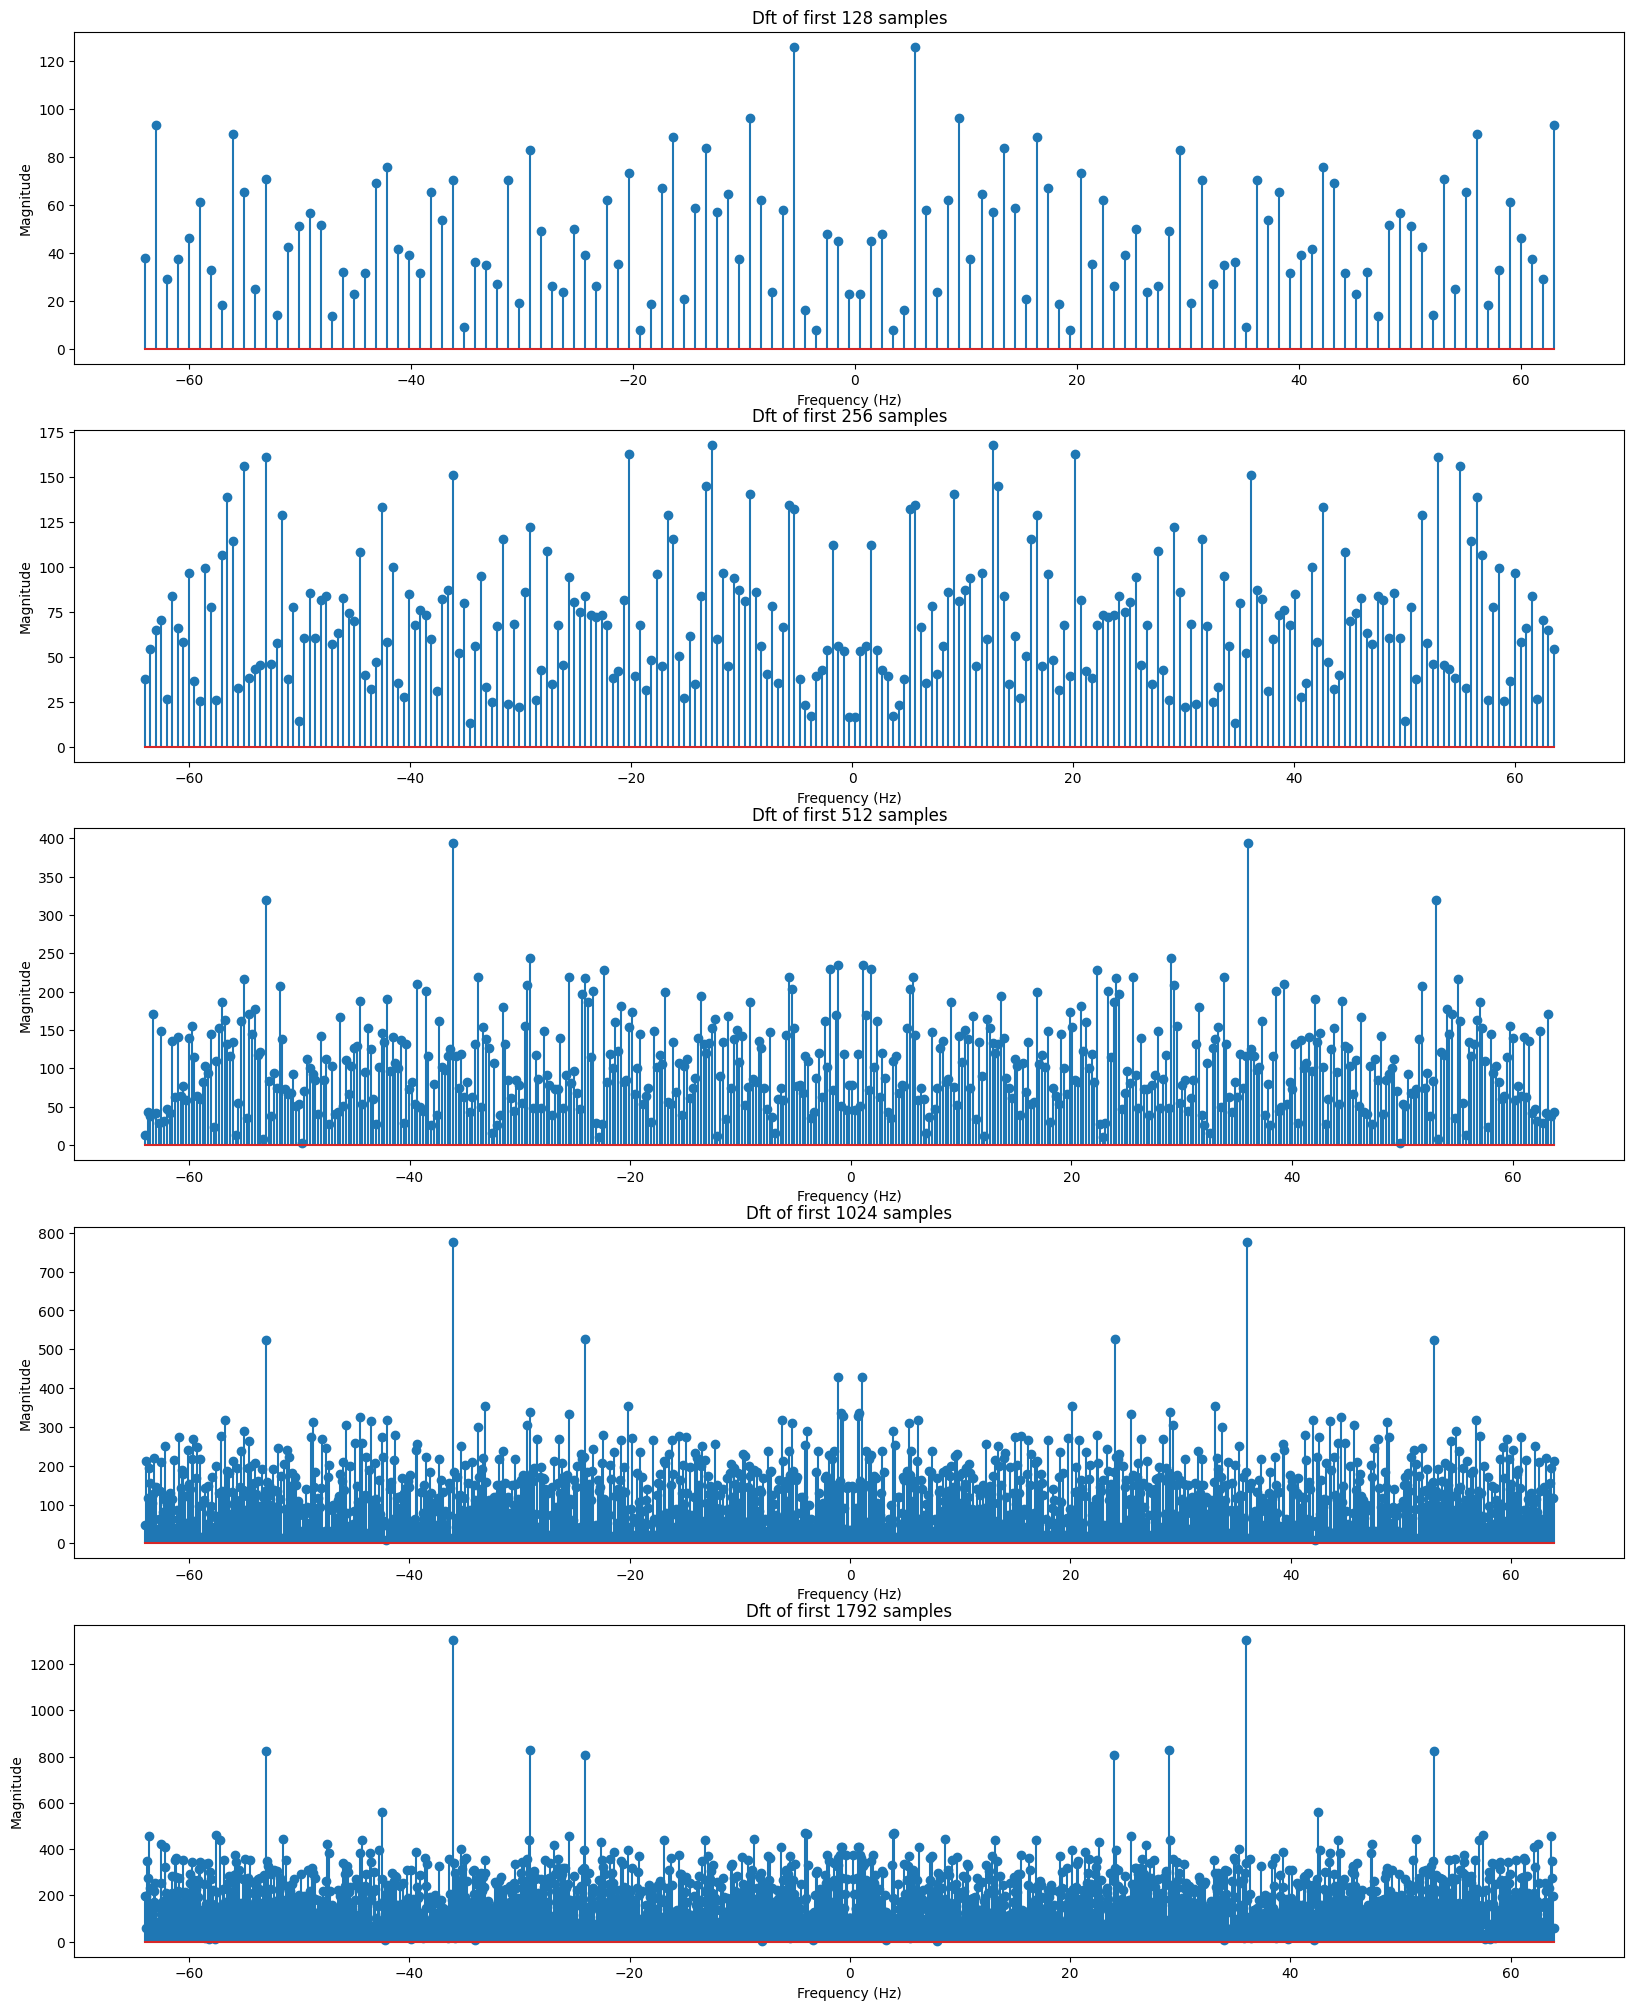

In [195]:
# Visualize the magnitude of the DFT result

fig,ax = plt.subplots(5,1,figsize=(20,25))
ax[0].stem(frequency_bins[0], np.abs(dft_result1))
ax[1].stem(frequency_bins[1], np.abs(dft_result2))
ax[2].stem(frequency_bins[2], np.abs(dft_result3))
ax[3].stem(frequency_bins[3], np.abs(dft_result4))
ax[4].stem(frequency_bins[4], np.abs(dft_result5))

ax[0].set_title('Dft of first 128 samples')
ax[1].set_title('Dft of first 256 samples')
ax[2].set_title('Dft of first 512 samples')
ax[3].set_title('Dft of first 1024 samples')
ax[4].set_title('Dft of first 1792 samples')

ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[4].set_xlabel('Frequency (Hz)')
ax[4].set_ylabel('Magnitude')

plt.show()

Selected harmony 1 : 24 Hz
Selected harmony 2 : 29 Hz
Selected harmony 3 : 36 Hz
Selected harmony 4 : 53 Hz


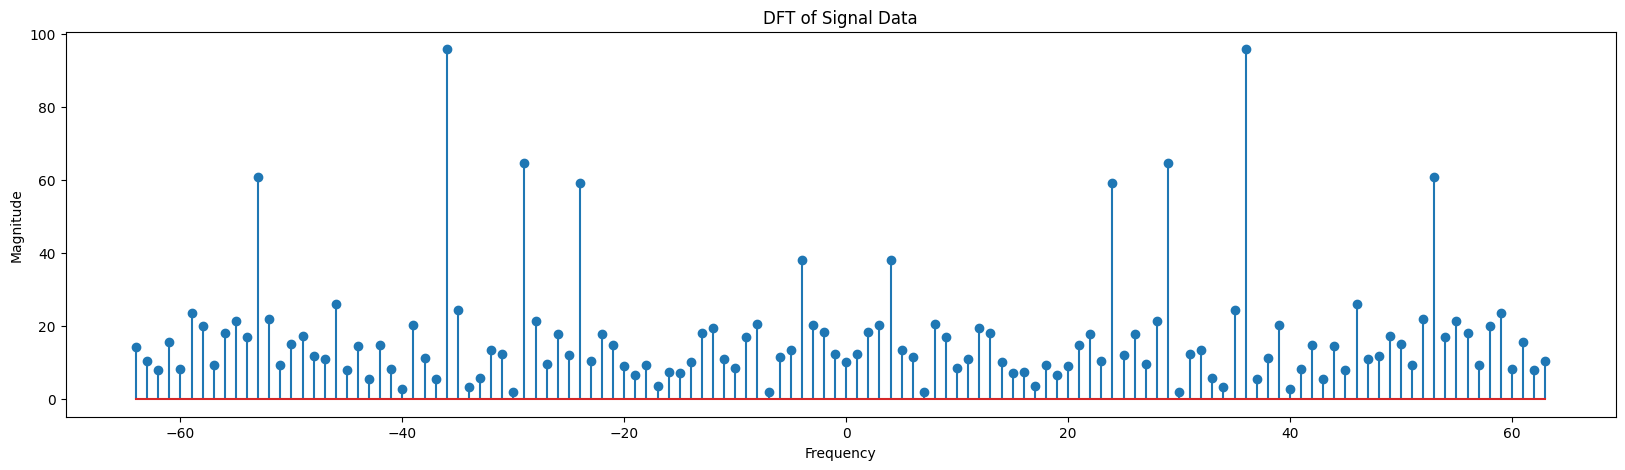

In [196]:
# DFT Averaging Method
# Initialize variables
original_array = data
L = 14

subsample_size = int(len(data)/L)
num_subsamples = len(original_array) // subsample_size

# Create Subsets with necessary samples
subsamples = [original_array[i * subsample_size:(i + 1) * subsample_size] for i in range(num_subsamples)]

# Calculation of DFT
dft_result_sub_samples = np.fft.fft(subsamples)
frequency_bins_sub_samples = np.arange((-sample_frequency/2),(sample_frequency/2),sample_frequency/subsample_size)

# Averaging DFT
average_dft = np.mean(dft_result_sub_samples, axis=0)

# Finding the Harmonic Frequencies
sorted_array = np.argsort(np.abs(average_dft))[::-1]
top_indices = sorted_array[:8]
top_frequencies = top_indices - int(sample_frequency/2)
top_frequencies.sort()

for i in range(len(top_frequencies[4:])): 
    print("Selected harmony",i+1,":", top_frequencies[4:][i],"Hz")


# Visualize the magnitude of the DFT result
fig,ax = plt.subplots(figsize=(20,5))
ax.stem(frequency_bins_sub_samples, np.abs(average_dft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()

# Question 02

In [197]:
import matplotlib.pyplot as plt
import wave
import numpy as np

# Read the audio file
audio_file = wave.open('handel_audio.wav', 'r')

sample_frequency = audio_file.getframerate()
num_samples = audio_file.getnframes()
audio_data = audio_file.readframes(num_samples)
audio_array = np.frombuffer(audio_data, dtype=np.int16)

# Initailize the sample array
N = 20000
y_n = audio_array[:N]

# Creating Subsets
x_1 = y_n[0:N]
x_2 = y_n[0:N:2]
x_3 = y_n[0:N:3]
x_4 = y_n[0:N:4]

# Verifyng sets
print("shape of array : ",x_1.shape)
print("shape of array : ",x_2.shape)
print("shape of array : ",x_3.shape)
print("shape of array : ",x_4.shape)


shape of array :  (20000,)
shape of array :  (10000,)
shape of array :  (6667,)
shape of array :  (5000,)


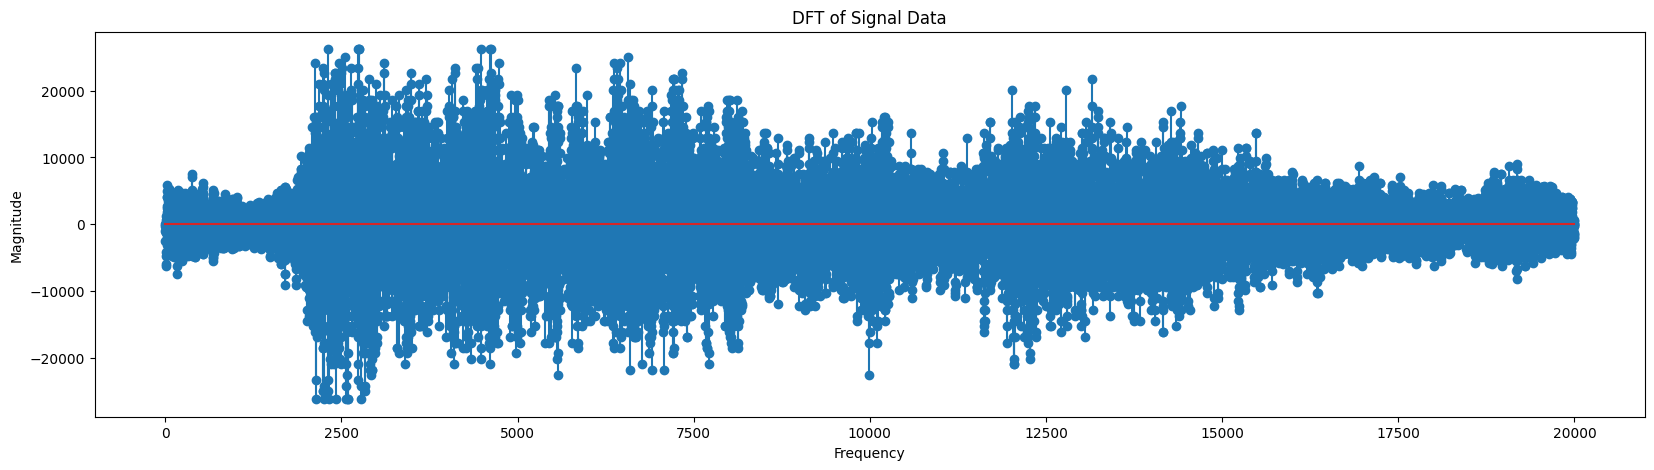

In [198]:

fig,ax = plt.subplots(figsize=(20,5))
ax.stem(y_n)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()

In [199]:
# Calculating the DFT
dft_result_x_1 = np.fft.fft(x_1)
dft_result_x_2 = np.fft.fft(x_2)
dft_result_x_3 = np.fft.fft(x_3)
dft_result_x_4 = np.fft.fft(x_4)
dft_result_y_n = np.fft.fft(y_n)


In [200]:
# Defining the Interpolation Procedure
def interpolation(array,k):
    N = len(array)
    N1 = int((N+1)/2)
    N2 = int(N/2)
    if N % 2 != 0:
        array_part_1 = np.array(array[:N1-1])
        array_part_2 = np.zeros(k*N)
        array_part_3 = np.array(array[N1:N])
        interpolated_array = np.concatenate((array_part_1,array_part_2,array_part_3))
    else:
        array_part_1 = np.array(array[:N2])
        array_part_2 = np.zeros(k*N-1)
        array_part_3 = np.array(array[N2+1:N])
        term = array[N2+1] / 2
        term = np.reshape(term,1)
        interpolated_array = np.concatenate((array_part_1,term,array_part_2,term,array_part_3))
    return interpolated_array    


In [201]:
# Interpoating the Signals in Frequency Domain
interpolated_x_2 = interpolation(dft_result_x_2,1)
interpolated_x_3 = interpolation(dft_result_x_3,2)
interpolated_x_4 = interpolation(dft_result_x_4,3)


In [202]:
# Re-Constructinf the Original Signal
redefined_x_2 = np.fft.ifft(interpolated_x_2)
redefined_x_2 *= 2
redefined_x_3 = np.fft.ifft(interpolated_x_3)
redefined_x_3 *= 3
redefined_x_4 = np.fft.ifft(interpolated_x_4)
redefined_x_4 *= 4


redefined_x_n = np.fft.ifft(y_n)

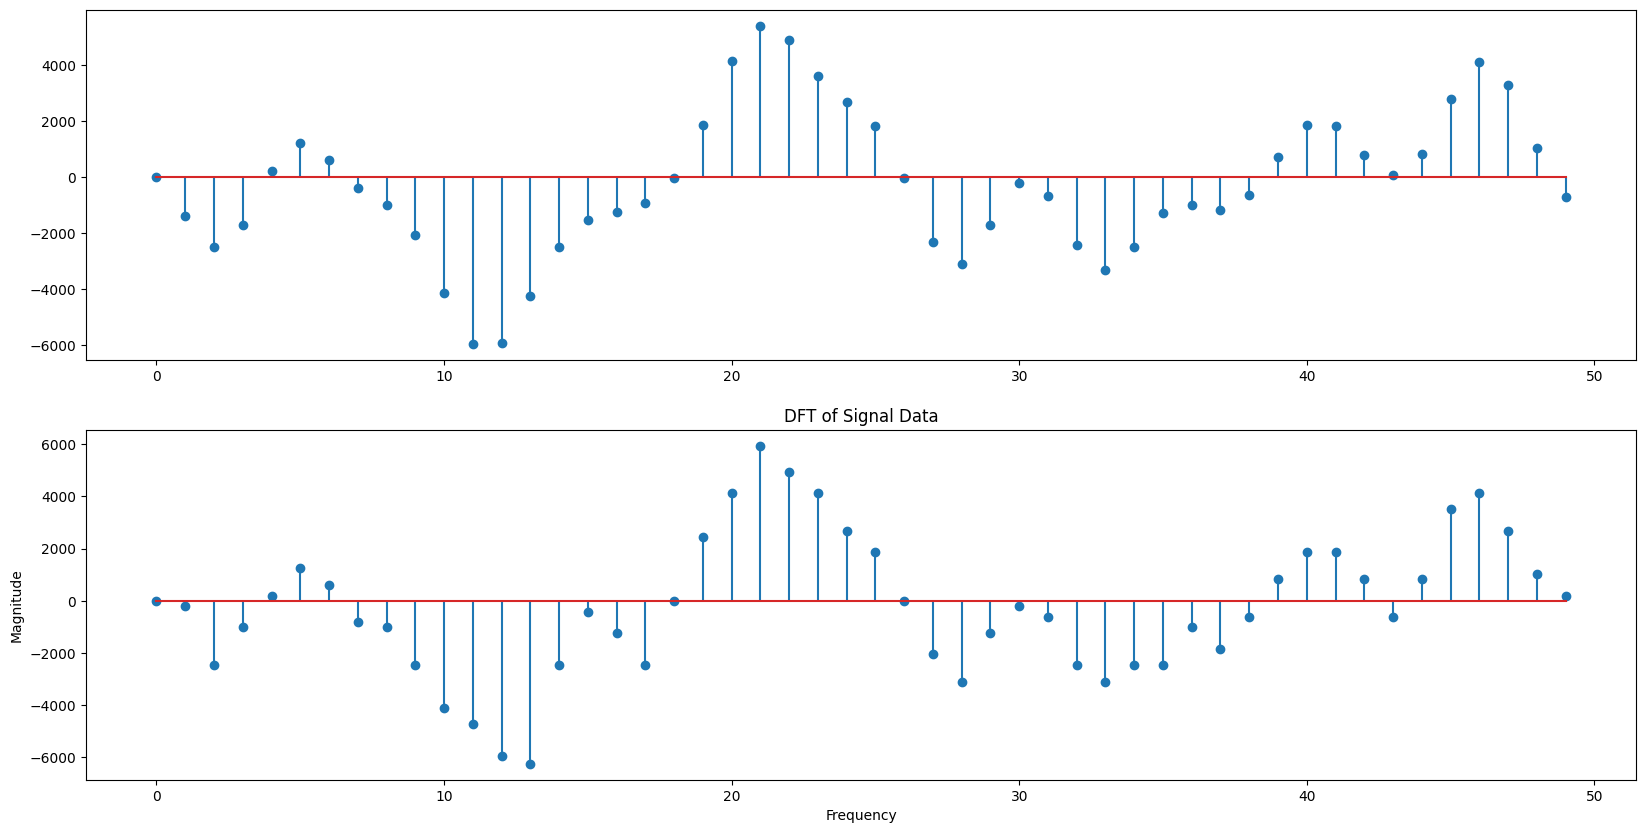

In [203]:
# Visualizing the Signals
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].stem(redefined_x_2[:50])
ax[1].stem(y_n[:50])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()

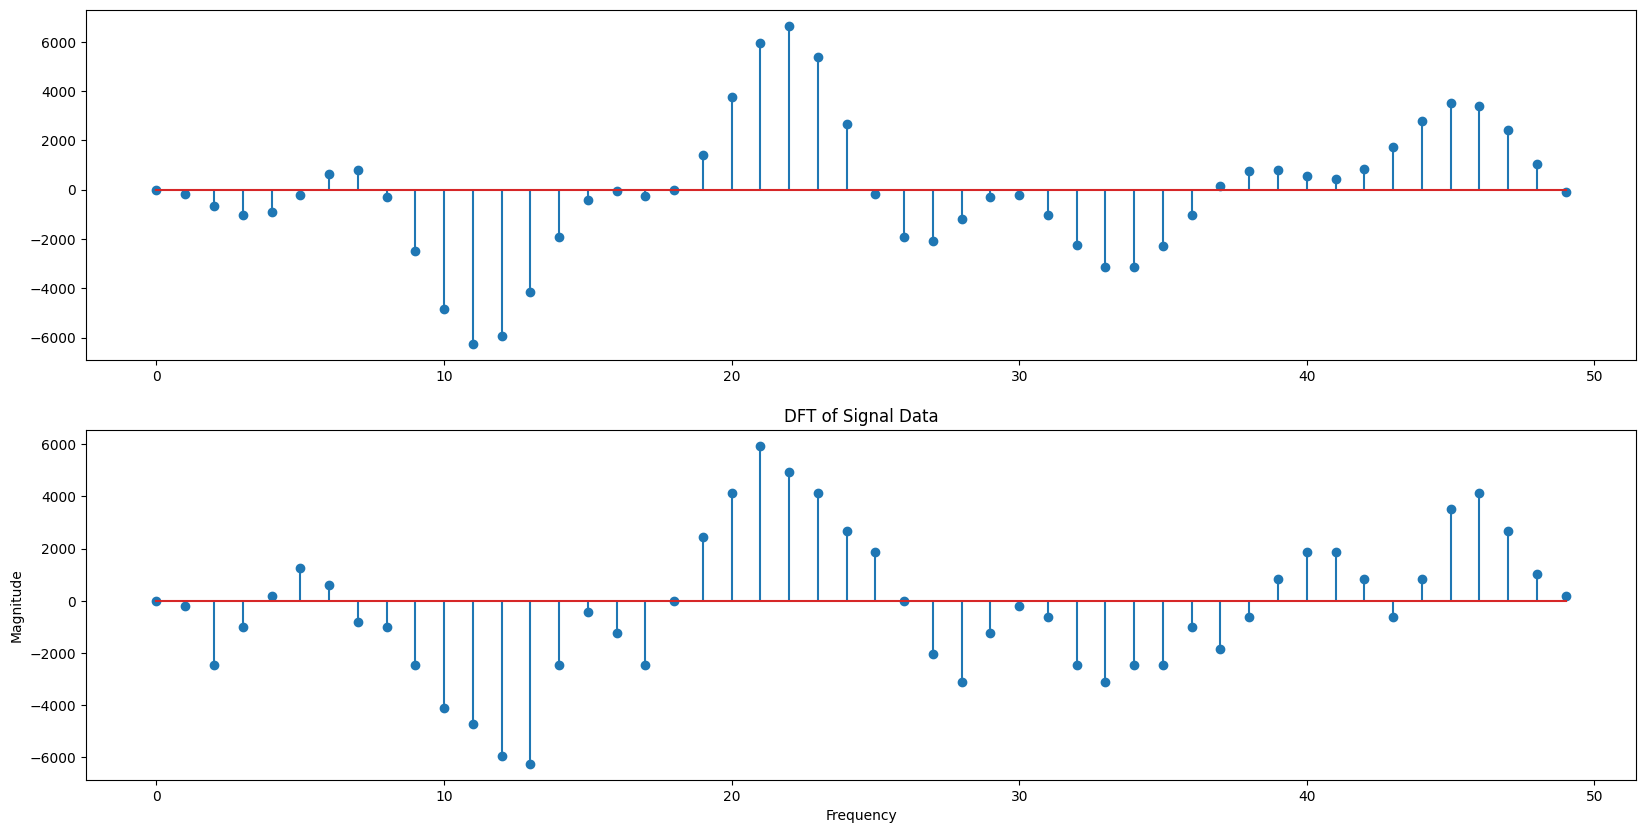

In [204]:
# Visualizing the Signals
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].stem(redefined_x_3[:50])
ax[1].stem(y_n[:50])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()

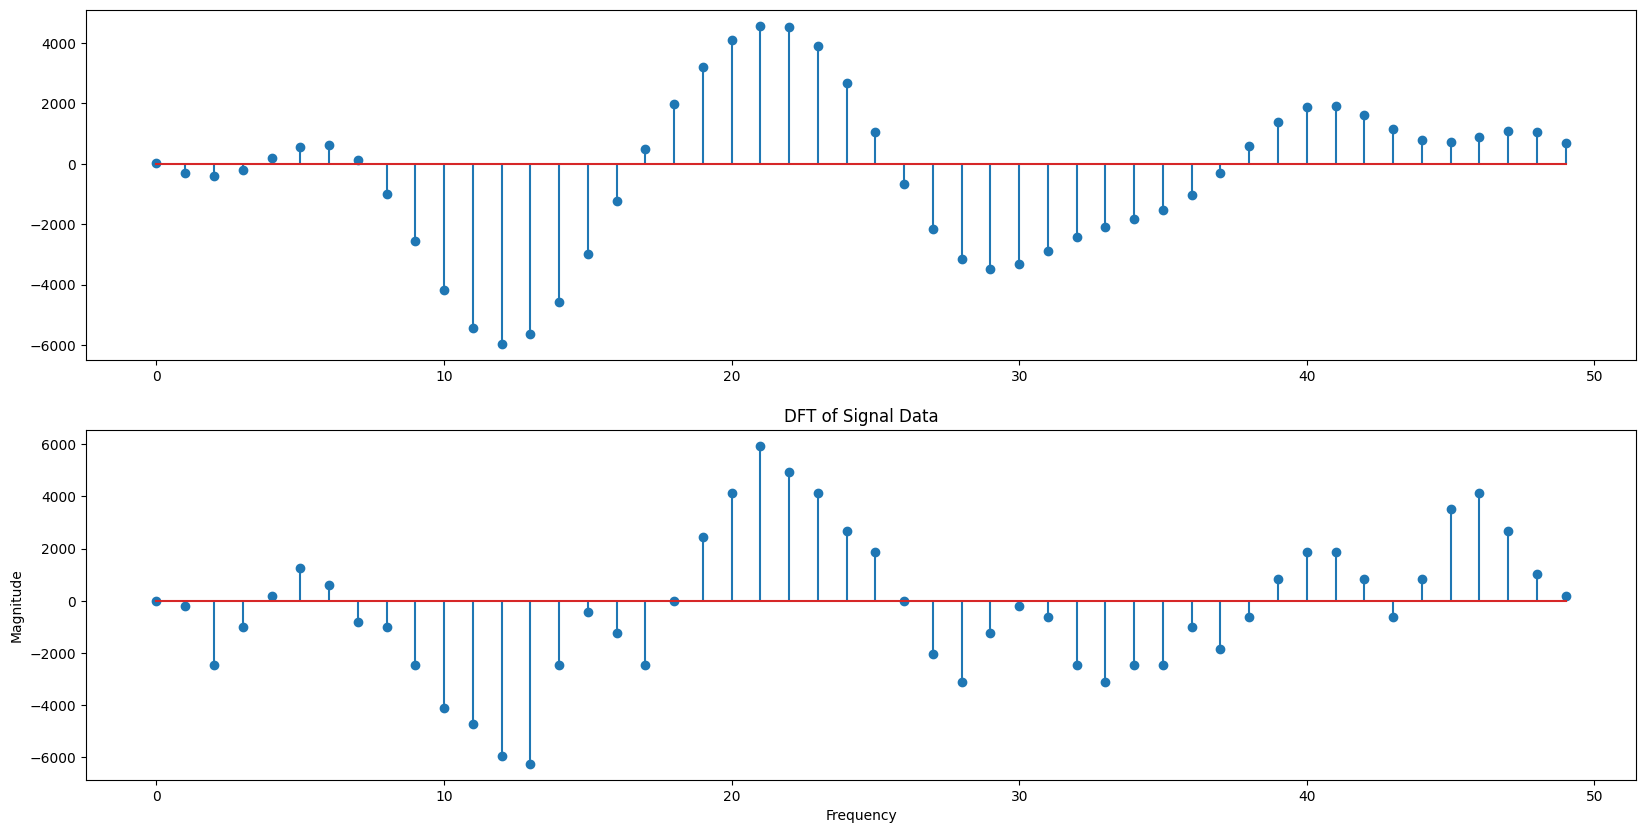

In [205]:
# Visualizing the Signals
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].stem(redefined_x_4[:50])
ax[1].stem(y_n[:50])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()